## Integrace funkce jedn√© promƒõnn√©


V tomto cviƒçen√≠ si nejprve vyzkou≈°√≠me nal√©zt primitivn√≠ funkci k zadan√© funkci pomoc√≠ symbolick√© manipulace a n√°slednƒõ si vyzkou≈°√≠me spoƒç√≠tat urƒçit√Ω integr√°l pomoc√≠ lichobƒõ≈æn√≠kov√©ho pravidla z Newton-Cotesov√Ωch vzorc≈Ø.

#### CACv.11.1: Neurƒçit√Ω integr√°l

Naleznƒõte primitivn√≠ funkci k zadan√© funkci (tzn. ≈ôe≈°te neurƒçit√Ω integr√°l zadan√© funkce)
$$
F(x) = \int (-3x^2+4x+5)dx
$$

Pro v√Ωpoƒçet neurƒçit√©ho integr√°lu vyu≈æijeme modul sympy.

Manu√°l: [Sympy](https://docs.sympy.org/latest/modules/integrals/integrals.html)

In [1]:
import sympy
x = sympy.Symbol("x")
sympy.integrate(-3*x**2 + 4*x + 5, x)

-x**3 + 2*x**2 + 5*x

#### CACv.11.2: Urƒçit√Ω integr√°l

Spoƒç√≠tejte n√°sleduj√≠c√≠ urƒçit√Ω integr√°l na zadan√©m intervalu
$$
F(x) = \int_{0}^{3} (-3x^2+4x+5)dx
$$


V√Ωpoƒçet provedeme pomoc√≠ lichobƒõ≈æn√≠kov√© integrace. Pro procviƒçen√≠ provedeme integraci nejprve naivn√≠m zp≈Øsobem, n√°slednƒõ ve formƒõ Newton-Cotesova vzorce a na z√°vƒõr pomoc√≠ knihovny numpy.

integrace lichobƒõ≈æn√≠kov√Ωm pravidlem

<img src="data/s11_trap.png" alt="Drawing" style="width: 400px;"/>

P≈ô√≠prava funkce

In [3]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Polygon

def f(x): 
    return -3*x**2 + 4*x + 5
   
a = 0
b = 3

 #analytick√© ≈ôe≈°en√≠: I(-3x2 + 4x + 5)(a,b) = [-x3 + 2x2 + 5x](0,3) = -27 + 18 + 15 = 6

Obd√©ln√≠kov√© pravidlo

Obd√©ln√≠k: 6.007499999999993


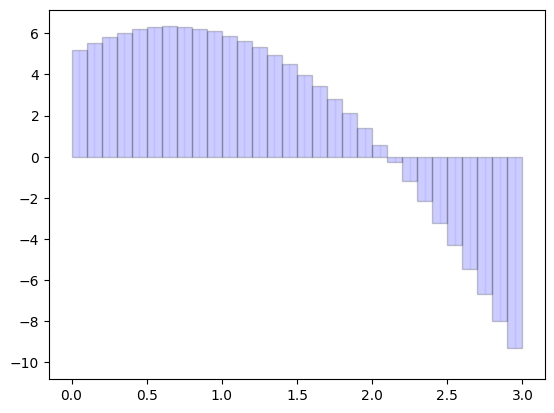

In [6]:
dx = 0.1

integral = 0                                    # integr√°ln√≠ souƒçet
x = a
i = 0
fig, ax = plt.subplots()                        # vytvo≈ôen√≠ grafu
while x < b:
    xp = (x + x+dx) / 2                         # st≈ôed intervalu
    height = f(xp)                              # v√Ω≈°ka obd√©ln√≠k≈Ø jako funkƒçn√≠ hodnota st≈ôedu intervalu
    #height = (f(x) + f(x + dx)) / 2            # lichobƒõ≈æn√≠k
    integral += dx * height                     # p≈ô√≠r≈Østek v intervalu dx - obd√©ln√≠k

    # objekty pro graf: Rectangle((x,y), ≈°√≠≈ôka, v√Ω≈°ka, ...)
    rectangle = Rectangle((x, 0), dx, height, edgecolor='black', facecolor='blue', alpha=0.2)
    line = Rectangle((xp, 0), 0, height, edgecolor='b', facecolor='none', alpha=0.07)
    ax.add_patch(rectangle)
    ax.add_patch(line)

    x += dx

print("Obd√©ln√≠k:", integral)
ax.plot(x,f(x))                                 # graf
plt.show()


Lichobƒõ≈æn√≠kov√© pravidlo

Lichobƒõ≈æn√≠k: 5.984999999999994


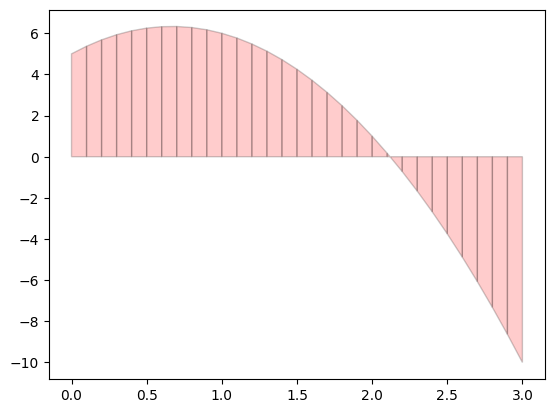

In [7]:
dx = 0.1

integral = 0                                    # integr√°ln√≠ souƒçet
x = a
i = 0
fig, ax = plt.subplots()                        # vytvo≈ôen√≠ grafu
while x < b:
    integral += dx * (f(x) + f(x+dx))/2         # obsah lichobƒõ≈æn√≠ku

    # Vykreslen√≠ d√≠lƒç√≠ho lichobƒõ≈æn√≠ku
    trapezoid = Polygon([(x,0), (x,f(x)), (x+dx,f(x+dx)), (x+dx,0)],                # v√Ωpis jednotliv√Ωch bod≈Ø 
                       closed=True, edgecolor='black', facecolor='red', alpha=0.2)  # dal≈°√≠ parametry
    ax.add_patch(trapezoid)

    x += dx

print("Lichobƒõ≈æn√≠k:", integral)
ax.plot(x,f(x))                                 # graf
plt.show()


Integrace ve formƒõ Newtonov√Ωch-Cotesov√Ωch vzorc≈Ø
$$
S = h \left[\frac{f(a) + f(b)}{2}\right] + h\sum_{i=1}^{n-1} f(x_i)
$$

In [8]:
n = int((b-a) // dx) + 1            # poƒçet dƒõlen√≠ (dx = h)
integral = (f(a) + f(b)) / 2        # z√°vorka (n√°soben√≠ h a≈æ na konci) - ƒçasto se dvojkou dƒõl√≠ na konci (suma se poƒç√≠t√° dvakr√°t)
for i in range(1, n):               # suma
    integral += f(a + i*dx)
integral *= dx                      # n√°soben√≠ h
print("Newton-Cotes:", integral)

Newton-Cotes: 5.984999999999998


pomoc√≠ knihovny numpy

In [9]:
import numpy as np
x = np.arange(a, b+dx, dx)              # prav√° mez nen√≠ standardnƒõ zapoƒç√≠t√°v√°na
y = f(x)
#print(np.trapz(y, dx=dx))              # dnes nepodporov√°no
print("Lichobƒõ≈æn√≠k (numpy):", np.trapezoid(y, dx=dx))           # trapezoid - lichobƒõ≈æn√≠k (pole y, pole x)

Lichobƒõ≈æn√≠k (numpy): 5.984999999999999


pomoc√≠ knihovny scipy

In [10]:
from scipy import integrate

scipy.integrate.trapezoid

In [11]:
# trapezoid
print("Lichobƒõ≈æn√≠k (scipy; rozd√≠l d√°n zaokrouhlen√≠m):")
print("d√°n vektor x: ", integrate.trapezoid(y, x=x))          # prvn√≠ argument v≈ædy funkce ve formƒõ pole, druh√Ω pole x
print(f"d√°no dx={dx}:  ", end=" ")
print(integrate.trapezoid(y, dx=dx))        # druh√Ω argument ≈°√≠≈ôka vzorkov√°n√≠

Lichobƒõ≈æn√≠k (scipy; rozd√≠l d√°n zaokrouhlen√≠m):
d√°n vektor x:  5.985
d√°no dx=0.1:   5.984999999999999


scipy.integrate.simpson
$$S=\frac{(b-a)}{3}\ \ \left( f(a)+4f(\frac{a+b}{2})+f(b)\right)$$

In [12]:
# simpson
x = np.arange(a, b+dx, dx)
y = f(x)
print("Simpson:")
print(integrate.simpson(y=y, x=x))          # argumenty stejn√© jako trapezoid
print(integrate.simpson(y=y, dx=dx))        # neboli dx=x[1]-x[0]

Simpson:
6.0000000000000036
5.999999999999996


scipy.integrate.romb (Rombergova integrace)
- po≈æaduje rovnomƒõrnƒõ rozm√≠stƒõn√© body a poƒçet vzork≈Ø mus√≠ b√Ωt 2^k + 1

In [13]:
# romberg 
#print(integrate.romberg(f, a, b))          # funkce, ne pole - dnes zastaral√© (nahrazeno quad)
x = np.linspace(a, b, 2**4 + 1)             # dƒõlen√≠ mus√≠ b√Ωt 2^n+1
y = f(x)                                    # pole
print(integrate.romb(y, dx=x[1]-x[0]))      # p≈ôesnost

6.0


scipy.integrate.quad (Adaptivn√≠ kvadraturn√≠ metoda - QUADPACK)
- automaticky vol√≠ body a velikosti krok≈Ø, aby dos√°hla po≈æadovan√© p≈ôesnosti

In [20]:
# gaussian
result, error = integrate.quad(f, a, b)              # argumentem funkce - ne pole!
print(result, error)

6.000000000000002 1.5662313965009494e-13


### Samostatn√° cviƒçen√≠

#### SCv.11.1: Symbolick√° matematika

Pomoc√≠ symbolick√© matematiky vypoƒç√≠tejte n√°sleduj√≠c√≠ integr√°ly. Zkuste p≈ôedem odhadnout podm√≠nky integrace a existence primitivn√≠ funkce.
$$
F(x) = \int_{-\infty}^{\infty} e^{-ax^2} {\rm d}x
$$

In [42]:
import sympy
import numpy as np
import matplotlib.pyplot as plt

P≈ô√≠klad integrace

In [43]:
x = sympy.Symbol("x")
a = sympy.Symbol("a")
f = sympy.exp(-a*x**2)
#sympy.Integral(f, x).doit()        # pouze v√Ωpis, v√Ωpoƒçet p≈ôes doit()
F = sympy.integrate(f, x)           # primitivn√≠ funkce
display(F)
display(sympy.integrate(f, (x, -np.inf, np.inf)))   # urƒçit√Ω integr√°l

Piecewise((sqrt(pi)*erf(sqrt(a)*x)/(2*sqrt(a)), Ne(a, 0)), (x, True))

Piecewise((sqrt(pi)/sqrt(a), Abs(arg(a)) <= pi/2), (Integral(exp(-a*x**2), (x, -oo, oo)), True))

Vykreslen√≠ (pomoc√≠ sympy)

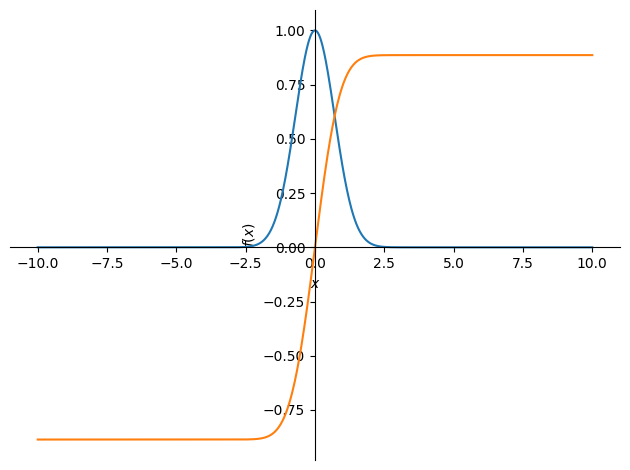

In [44]:
a0 = 1
sympy.plot(f.subs(a, a0), F.subs(a, a0));

Tot√©≈æ pomoc√≠ matplotlib (nutno lambdifikovat)

sqrt(pi)*erf(x)/2
sqrt(pi)*erf(x)/2


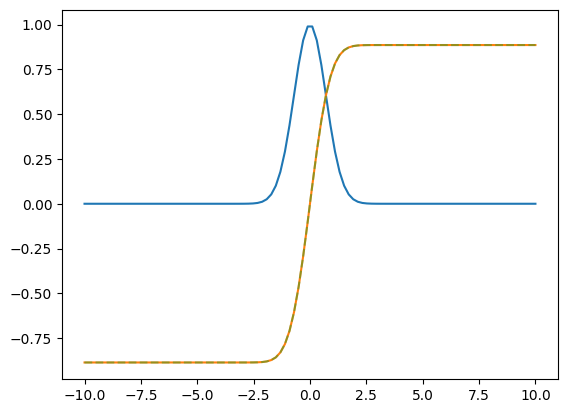

In [ ]:
f_np = sympy.lambdify(x, f.subs(a, a0), 'numpy')    # Vytvo≈ôen√≠ funkce f pro vyhodnocen√≠ v√Ωrazu
print(F.subs(a, a0))
F_np = sympy.lambdify(x, F.subs(a, a0), 'scipy')    # Vytvo≈ôen√≠ funkce F pro vyhodnocen√≠ v√Ωrazu

xs = np.linspace(-10,10,100)
ys = f_np(xs)
Ys = F_np(xs)
plt.plot(xs, ys, xs, Ys)

# Vykreslen√≠ v√Ωsledku zadan√©ho p≈ô√≠mo (p≈ôedpisem)
G = sympy.sqrt(sympy.pi)/2*sympy.erf(x)
print(G)
G_np = sympy.lambdify(x, G, 'scipy')
Zs = G_np(xs)
plt.plot(xs, Zs, "--", alpha=0.5);

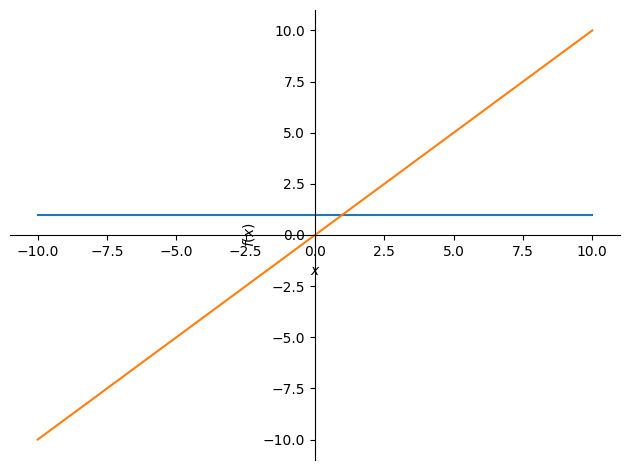

In [ ]:
# pro a = 0 je v√Ωsledek jin√Ω
a0 = 0
sympy.plot(f.subs(a, a0), F.subs(a, a0));

$$
F(x) = \int x^a {\rm d}x
$$

Piecewise((x**(a + 1)/(a + 1), Ne(a, -1)), (log(x), True))

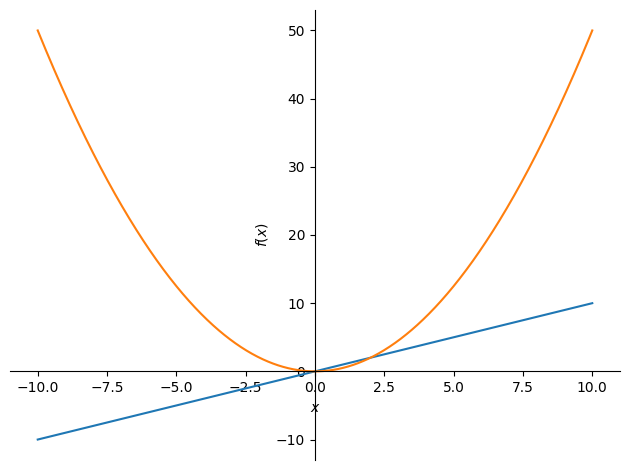

In [65]:
x = sympy.Symbol("x")
a = sympy.Symbol("a")
f = x**a
F = sympy.integrate(f, x)
display(F)

a0 = 1
sympy.plot(f.subs(a, a0), F.subs(a, a0));

P≈ô√≠klad tƒõ≈æko ≈ôe≈°iteln√Ω pomoc√≠ sympy
$$
F(x) = \int \arccos(\sin x) {\rm d}x
$$

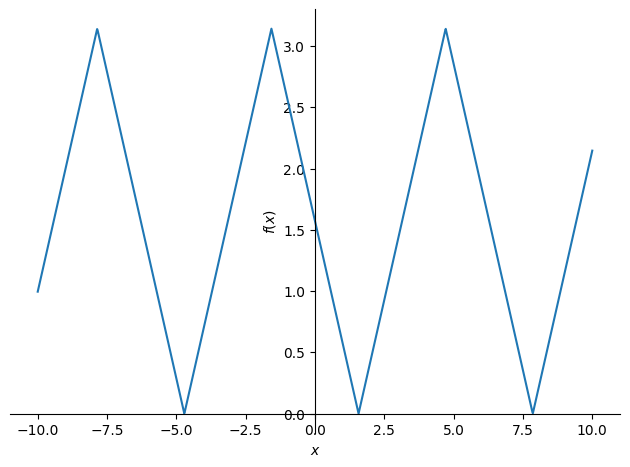

In [66]:
x = sympy.Symbol("x")
f = sympy.acos(sympy.sin(x))
sympy.plot(f);

In [ ]:
# selh√°n√≠ analytick√© metody (v√Ωpoƒçet trv√° kolem minuty a vr√°t√≠ to sam√©)
x = sympy.Symbol("x")
f = sympy.acos(sympy.sin(x))
F = sympy.integrate(f, x)
display(F)

Integral(acos(sin(x)), x)

Vykreslen√≠ numericky pomoc√≠ scipy.integrate.cumulative_trapezoid

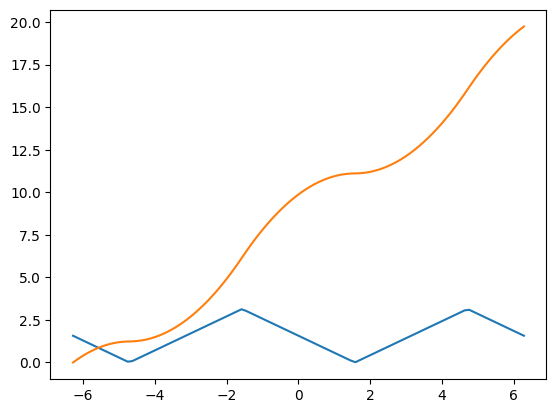

In [24]:
# vykreslen√≠ primitivn√≠ fce pomoc√≠ numerick√© metody
from scipy import integrate

def f(x):                                                   # definice funkce arccos(sin(x))
    return np.arccos(np.sin(x))

xs = np.linspace(-2*np.pi, 2*np.pi, 100)                    # testovac√≠ hodnoty x

#F_values = integrate.cumtrapz(f(xs), xs, initial=0)         # zastaral√° metoda
Fs = integrate.cumulative_trapezoid(f(xs), xs, initial=0)   # vypoƒçet primitivn√≠ funkce numericky

plt.plot(xs, f(xs))                                         # vykreslen√≠ f
plt.plot(xs, Fs)                                            # vykreslen√≠ F
plt.show()


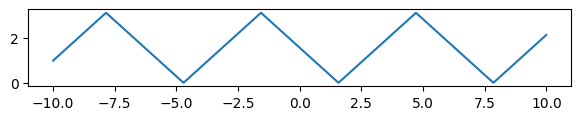

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):                                   # definice funkce arccos(sin(x))
    x_mod = (x - np.pi/2) % (2 * np.pi)     # periodick√© roz≈°√≠≈ôen√≠ na cel√Ω definiƒçn√≠ obor
    if 0 <= x_mod <= np.pi:
        return x_mod
    else:
        return 2*np.pi - x_mod

xs = np.linspace(-10, 10, 1000)
ys = np.array([f(x) for x in xs])

# Vykreslen√≠ grafu
plt.figure(figsize=(7, 1))
plt.plot(xs, ys);


Piecewise((x, (x >= 0) & (x < pi)), (-x + 2*pi, (x >= pi) & (x < 2*pi)))

Piecewise((nan, x < 0), (x**2/2, x < pi), (-x**2/2 + 2*pi*x - pi**2, x < 2*pi), (nan, True))

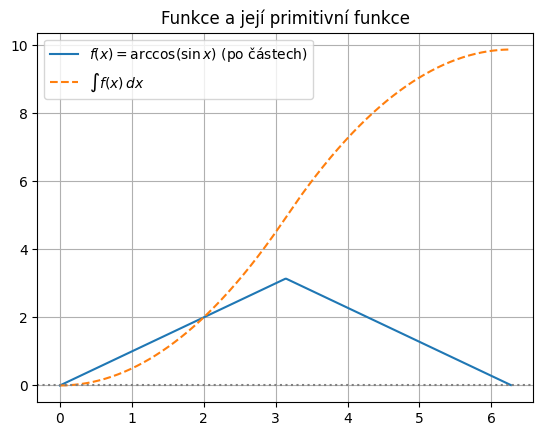

In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

x = sp.Symbol('x')      # symbolick√° promƒõnn√°

# Definice funkce po ƒç√°stech v intervalu [0, 2œÄ]
f = sp.Piecewise(
    (x,             sp.And(x >= 0, x < sp.pi)),
    (2*sp.pi - x,   sp.And(x >= sp.pi, x < 2*sp.pi))
)
# Funkce pro periodick√Ω interval (nep≈Øjde ale jednodu≈°e integrovat)
fp = sp.Piecewise(
    (x,             sp.And(x % (2*sp.pi) >= 0, x % (2*sp.pi) < sp.pi)),
    (2*sp.pi - x,   sp.And(x % (2*sp.pi) >= sp.pi, x % (2*sp.pi) < 2*sp.pi))
)
display(f)

# V√Ωpoƒçet primitivn√≠ funkce
F = sp.integrate(f, x)
display(F)

# Volitelnƒõ: ƒç√≠seln√© zobrazen√≠ funkce a jej√≠ primitivn√≠ funkce
f_lambd = sp.lambdify(x, f, 'numpy')
F_lambd = sp.lambdify(x, F, 'numpy')

xx = np.linspace(0, 2*np.pi, 500)
plt.plot(xx, f_lambd(xx), label=r'$f(x) = \arccos(\sin x)$ (po ƒç√°stech)')
plt.plot(xx, F_lambd(xx), label=r'$\int f(x)\,dx$', linestyle='--')
plt.axhline(0, color='gray', linestyle=':')
plt.title("Funkce a jej√≠ primitivn√≠ funkce")
plt.legend()
plt.grid(True)
plt.show()


$$
F(x) = \int \ln(\sin x) {\rm d}x
$$

Integral(log(sin(x)), x)


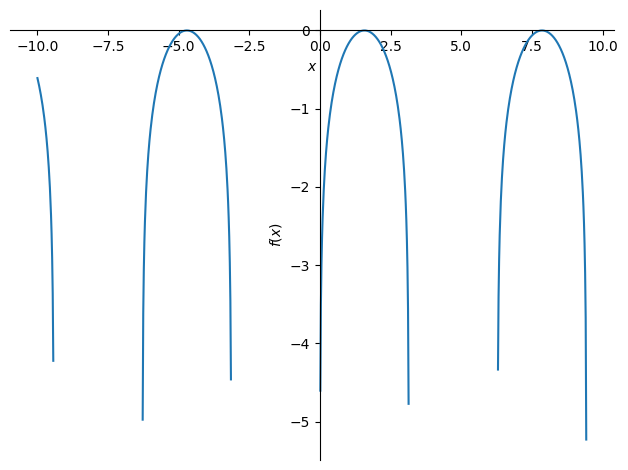

In [80]:
x = sympy.Symbol("x")
f = sympy.log(sympy.sin(x))
F = sympy.integrate(f, x)
print(F)
sympy.plot(f);

C:\Users\P\AppData\Local\Temp\ipykernel_18608\2235935891.py:5: RuntimeWarning: invalid value encountered in log
  return np.log(np.sin(x))


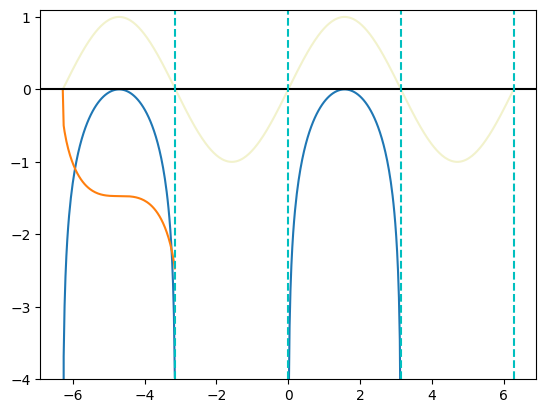

In [90]:
# vykreslen√≠ primitivn√≠ fce pomoc√≠ numerick√© metody
from scipy import integrate

def f(x):                                                   # definice funkce arccos(sin(x))
    return np.log(np.sin(x))

xs = np.linspace(-2*np.pi, 2*np.pi, 500)                    # testovac√≠ hodnoty x

#F_values = integrate.cumtrapz(f(xs), xs, initial=0)         # zastaral√° metoda
Fs = integrate.cumulative_trapezoid(f(xs), xs, initial=0)   # vypoƒçet primitivn√≠ funkce numericky

plt.plot(xs, f(xs))                                         # vykreslen√≠ f = log(sin(x))
plt.plot(xs, Fs)                                            # vykreslen√≠ F
plt.plot(xs, np.sin(xs), color="y", alpha=0.2)              # sin pro porovn√°n√≠
plt.axhline(y=0, color='k')
for i in range(-1, 3):                                      # 5 p≈ô√≠mek v intervalu [0, 2*np.pi]
    plt.axvline(i*np.pi, color='c', linestyle='--')         # perioda pi

plt.ylim(-4,1.1)
plt.show()


#### SCv.11.2: Urƒçit√Ω integr√°l

Pomoc√≠ built-in funkc√≠ nebo metod numerick√© matematiky vypoƒç√≠tejte n√°sleduj√≠c√≠ urƒçit√© integr√°ly. Pou≈æijte alespo≈à t≈ôi r≈Øzn√© integraƒçn√≠ metody a porovnejte je mezi sebou z hlediska p≈ôesnosti v√Ωpoƒçtu.
$$
\int_{0}^{2\pi} \sin(x) {\rm d}x
$$

In [32]:
import numpy as np
from scipy import integrate

def f(x):
    return np.sin(x)

a = 0
b = 2*np.pi
dx = 0.1

x = np.arange(a, b+dx, dx)
y = f(x)

print("trapezoid: ", integrate.trapezoid(y, x=x))
print("simpson: ", integrate.simpson(y=y, x=x))
#print("romberg: ", integrate.romberg(f, a, b))

x = np.linspace(a, b, 2**4 + 1)             # mus√≠ b√Ωt 2**n + 1
y = f(x)                                    # pole
print("romberg: ", integrate.romb(y=y, dx=dx))

trapezoid:  0.00014124579393251947
simpson:  0.00013721143474511267
romberg:  -2.710426224899907e-22


In [27]:
import sympy
x = sympy.Symbol("x")
# fce definovan√° pomoc√≠ numpy je numerick√°, sympy pot≈ôebuje symbolick√© v√Ωrazy
def f(x):
    return sympy.sin(x)
display(sympy.integrate(f(x), x))       # primitivn√≠ fce
sympy.integrate(f(x), (x, a, b))        # urƒçit√Ω integr√°l

-cos(x)

0

$$
\int_{0}^{1} \left[ x^2 - 2x + 6 \right] {\rm d}x
$$

In [38]:
import numpy as np

def f(x):
    return x**2 - 2*x + 6

a = 0
b = 1
dx = 0.1

x = np.arange(a, b+dx, dx)
y = f(x)

print("trapezoid: ", integrate.trapezoid(y, x=x))
print("simpson: ", integrate.simpson(y=y, x=x))
#print("romberg: ", integrate.romberg(f, a, b))
x = np.linspace(a, b, 2**4 + 1)
y = f(x)                                    # pole
print("romberg: ", integrate.romb(y=y, dx=x[1]-x[0]))


trapezoid:  5.335
simpson:  5.333333333333333
romberg:  5.333333333333333


In [39]:
import sympy
x = sympy.Symbol("x")
# fce definovan√° pomoc√≠ numpy je numerick√°, sympy pot≈ôebuje symbolick√© v√Ωrazy
def f(x):
    return x**2 - 2*x + 6
display(sympy.integrate(f(x), x))       # primitivn√≠ fce
sympy.integrate(f(x), (x, a, b))        # urƒçit√Ω integr√°l

x**3/3 - x**2 + 6*x

16/3

$$
\int_0^{\pi/4} e^{3x}\sin(2x) {\rm d}x
$$

In [40]:
import numpy as np

def f(x):
    return np.exp(3*x)*np.sin(2*x)

a = 0
b = np.pi/4.
dx = 0.1

x = np.arange(a, b+dx, dx)
y = f(x)

print("trapezoid: ", integrate.trapezoid(y, x=x))
print("simpson: ", integrate.simpson(y=y, x=x))
#print("romberg: ", integrate.romberg(f, a, b))
x = np.linspace(a, b, 2**4 + 1)
y = f(x)                                    # pole
print("romberg: ", integrate.romb(y=y, dx=x[1]-x[0]))

trapezoid:  2.771455172001907
simpson:  2.746005660082776
romberg:  2.5886286332438933


In [41]:
import sympy
x = sympy.Symbol("x")
# fce definovan√° pomoc√≠ numpy je numerick√°, sympy pot≈ôebuje symbolick√© v√Ωrazy
def f(x):
    return sympy.exp(3*x)*sympy.sin(2*x)
display(sympy.integrate(f(x), x))       # primitivn√≠ fce
sympy.integrate(f(x), (x, a, b))        # urƒçit√Ω integr√°l

3*exp(3*x)*sin(2*x)/13 - 2*exp(3*x)*cos(2*x)/13

2.58862863250718

### Dom√°c√≠ cviƒçen√≠

#### DCv.11.1: Newtonovy-Cotesovy vzorce
Naprogramujte si zbyl√© Newtonovy-Cotesovy vzorce (Simpsonovo pravidlo, Simpsonovo 3/8 pravidlo, Booleovo pravidlo) sv√©pomoc√≠ a porovnejte jejich p≈ôesnost s lichobƒõ≈æn√≠kov√Ωm pravidlem. 

<img src="data/s11_nc.png" alt="Drawing" style="width: 600px;"/>

Kolik subinterval≈Ø pot≈ôebuj√≠ jednotliv√© metody, aby dos√°hly dostateƒçn√© p≈ôenosti?

#### DCv.11.2: Interpolace a integrace

N√°sleduj√≠c√≠ tabulka obsahuje sou≈ôadnice hranice pozemku v metrech. Pomoc√≠ lichobƒõ≈æn√≠kov√© integrace zjistƒõte rozlohu pozemku v metrech ƒçtvereƒçn√≠ch. Data tak√© naleznete v souboru pozemek.txt.

<table>
    <thead style="background-color:#444444;">
        <td>x</td><td>y</td>
    </thead>
    <tr>
        <td>0</td><td>125</td>
    </tr>
    <tr>
        <td>100</td><td>125</td>
    </tr>
    <tr>
        <td>200</td><td>120</td>
    </tr>
    <tr>
        <td>300</td><td>112</td>
    </tr>
    <tr>
        <td>400</td><td>90</td>
    </tr>
    <tr>
        <td>500</td><td>90</td>
    </tr>
    <tr>
        <td>600</td><td>95</td>
    </tr>
    <tr>
        <td>700</td><td>88</td>
    </tr>
    <tr>
        <td>800</td><td>75</td>
    </tr>
    <tr>
        <td>900</td><td>35</td>
    </tr>
    <tr>
        <td>1000</td><td>0</td>
    </tr>

</table>

#### DCv.11.3: Rombergova integrace

Jeden ze zp≈Øsob≈Ø, jak zvƒõt≈°it p≈ôenost intergrace, je Richardsonova extrapolace (RE). 

C√≠lem RE je zlep≈°it integraƒçn√≠ p≈ôenost eliminac√≠ chyb. 

Rombergova integrace (neboli Rombergova kvadratura) zlep≈°uje v√Ωsledek lichobƒõ≈æn√≠kov√© integrace odstranƒõn√≠m chyb Richardsonovou extrapolac√≠. 

Zdroje k samostudiu: [CZ](http://physics.ujep.cz/~mlisal/nm_1/jskvor/PDF/IntegralRomberg.pdf) [EN](https://towardsdatascience.com/numerical-integration-romberg-integration-3f54002ab538)


$$ùëÜ(ùëõ,ùëö)=ùëÜ(ùëõ,ùëö‚àí1)+(ùëÜ(ùëõ,ùëö‚àí1)‚àíùëÜ(ùëõ‚àí1,ùëö‚àí1))/(4^ùëö‚àí1)$$


In [49]:
def f(x):
    return np.exp(3*x)*np.sin(2*x)

def romberg(a, b, i, j):
    if j == 0:
        n = 2**i
        dx = (b-a)/n
        #return np.trapz(f(np.linspace(a, b, n)), dx=dx)        # zastaral√©
        return np.trapezoid(f(np.linspace(a, b, n)), dx=dx)
    if 0 < j <= i:
        return romberg(a, b, i, j-1) + (romberg(a, b, i, j-1) - romberg(a, b, i-1, j-1))/(4**j - 1)

a = 0
b = np.pi/4.
print(romberg(a, b, i=10, j=5))

2.5870882254694396


Rombergova metoda - vlastn√≠ implementace a porovn√°n√≠

Rombergova tabulka:
['0.0000000000']
['1.5707963268', '2.0943951024']
['1.8961188979', '2.0045597550', '1.9985707318']
['1.9742316019', '2.0002691699', '1.9999831309', '2.0000055500']
['1.9935703438', '2.0000165910', '1.9999997525', '2.0000000163', '1.9999999946']
['1.9983933610', '2.0000010334', '1.9999999962', '2.0000000001', '2.0000000000', '2.0000000000']
['1.9995983886', '2.0000000645', '1.9999999999', '2.0000000000', '2.0000000000', '2.0000000000', '2.0000000000']

Rombergova metoda:  2.0000000000
Trapezoidn√≠ metoda: 1.9995983886
P≈ôesn√° hodnota:     2.0000000000


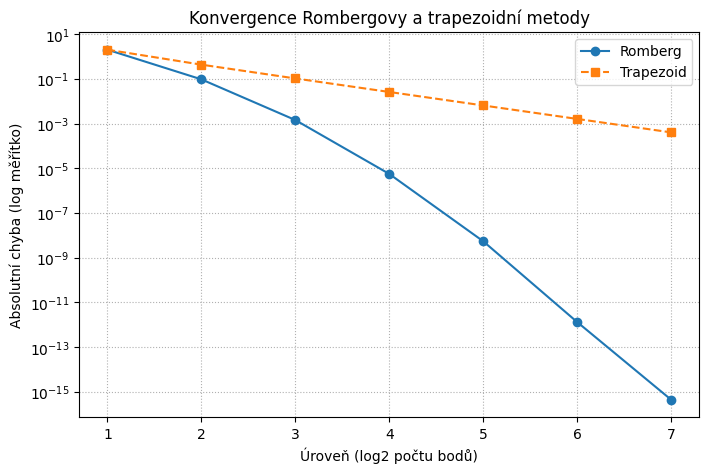

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):               # definovan√° funkce k integraci
    return np.sin(x)

a = 0                   # interval integrace
b = np.pi
n = 7                   # poƒçet √∫rovn√≠ (v√≠ce pro hezkou konvergenci)

# 1. Rombergova integrace
R = np.zeros((n, n))    # vytvo≈ô√≠me pr√°zdnou Rombergovu tabulku

h = b - a               # v√Ωpoƒçet prvn√≠ √∫rovnƒõ: jednoduch√© trapezoidn√≠ pravidlo
R[0, 0] = (h / 2) * (f(a) + f(b))

for i in range(1, n):   # vypl≈àujeme tabulku
    h /= 2              # polovina kroku
    # P≈ôiƒçteme nov√© uzly: jsou uprost≈ôed p≈ôedchoz√≠ch
    sum_new = sum(f(a + (k + 0.5) * 2 * h) for k in range(2**(i-1)))
    R[i, 0] = 0.5 * R[i-1, 0] + h * sum_new
    # Extrapolace smƒõrem doprava (vy≈°≈°√≠ p≈ôesnosti)
    for k in range(1, i+1):
        R[i, k] = (4**k * R[i, k-1] - R[i-1, k-1]) / (4**k - 1)

# 2. Trapezoidn√≠ metoda bez zjem≈àov√°n√≠
def trapezoid_simple(f, a, b, n_intervals):
    x = np.linspace(a, b, n_intervals+1)
    y = f(x)
    h = (b - a) / n_intervals
    return (h/2) * (y[0] + 2*np.sum(y[1:-1]) + y[-1])

# 3. P≈ôesn√° hodnota
exact = 2.0

# V√Ωpis tabulky
print("Rombergova tabulka:")
for i in range(n):
    print(["{:.10f}".format(R[i, j]) for j in range(i+1)])

# Nejlep≈°√≠ odhad integr√°lu je prav√Ω spodn√≠ roh
print(f"\nRombergova metoda:  {R[n-1, n-1]:.10f}")
# Porovn√°n√≠ s trapezoidn√≠ metodou
n_trap = 2**(n-1)
trap_result = trapezoid_simple(f, a, b, n_trap)
print(f"Trapezoidn√≠ metoda: {trap_result:.10f}")
print(f"P≈ôesn√° hodnota:     {exact:.10f}")

# Graf chyb konvergence - v√Ωpoƒçet chyb
romberg_errors = [abs(R[i, i] - exact) for i in range(n)]
trapezoid_errors = []

for i in range(1, n+1):
    n_trap = 2**(i-1)
    approx = trapezoid_simple(f, a, b, n_trap)
    trapezoid_errors.append(abs(approx - exact))

plt.figure(figsize=(8, 5))
plt.semilogy(range(1, n+1), romberg_errors, 'o-', label='Romberg')
plt.semilogy(range(1, n+1), trapezoid_errors, 's--', label='Trapezoid')
plt.xlabel('√örove≈à (log2 poƒçtu bod≈Ø)')
plt.ylabel('Absolutn√≠ chyba (log mƒõ≈ô√≠tko)')
plt.title('Konvergence Rombergovy a trapezoidn√≠ metody')
plt.grid(True, which="both", ls=":")
plt.legend()
plt.show()


#### V√Ωpoƒçet urƒçit√©ho integr√°lu metodou Monte Carlo

Jeliko≈æ Metodou Monte Carlo lze spoƒç√≠tat obsah nebo objem nƒõjak√© oblasti, lze s n√≠ spoƒç√≠tat i urƒçit√Ω integr√°l. Opakov√°n√≠ p≈ôedchoz√≠ metody tedy vede k my≈°lence:
1. vygeneruj n√°hodn√© sou≈ôadnice x a fx
2. zjisti, zda spadaj√≠ do oblasti, kterou funkce vytyƒçuje svou funkƒçn√≠ hodnotou nad/pod osou x
3. zapoƒçti nebo nezapoƒçti z√°sah
4. spoƒç√≠tej integr√°l jako obsah oblasti pomoc√≠ procenta z√°sah≈Ø a obsahu omezuj√≠c√≠ oblasti

Omezuj√≠c√≠ oblast spoƒç√≠t√°me jako obd√©ln√≠k, kter√Ω je ≈°i≈ôok√Ω jako definiƒçn√≠ obor a vysok√Ω jako obor hodnot. Zde se poƒç√≠t√° s t√≠m, ≈æe cel√Ω definiƒçn√≠ obor je spojit√Ω a stejnƒõ tak obor hodnot. Tento p≈ô√≠stup (tzv. rejection sampling metoda) bude v≈°ak znaƒçnƒõ nep≈ôesn√Ω a tak√© poƒç√≠t√° integr√°l v absolutn√≠ hodnotƒõ.

In [88]:
import random
import numpy as np
import matplotlib.pyplot as plt

Funkce $2x^2$ na intervalu <0, 2>

5.6


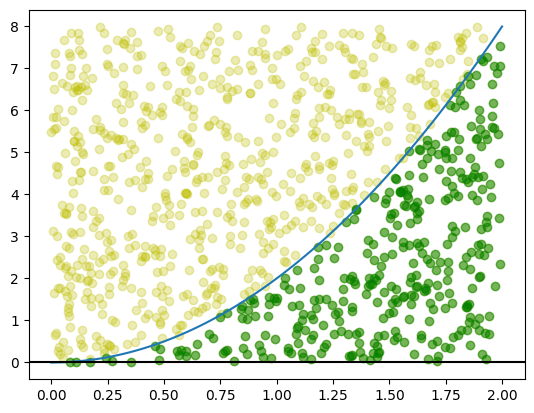

In [89]:
def zobraz(a, b, f, xs, fxs):
    x = np.linspace(a, b, 100)
    plt.plot(x, f(x))
    plt.axhline(y=0, color='k')

    condition = fxs < f(xs)
    xf = xs[condition]
    yf = fxs[condition]
    plt.scatter(xs, fxs, color='y', alpha=0.3)
    plt.scatter(xf, yf, color='g', alpha=0.5)

def integral(a, b, f, pocet_vzorku):
    max_f = max(f(np.linspace(a, b, 100000)))               # horn√≠ z√°vora
    xs = np.random.uniform(a, b, pocet_vzorku)              # n√°hodn√© hodnoty x (mezi a a b)
    fxs = np.random.uniform(0, max_f, pocet_vzorku)         # n√°hodn√© funkƒçn√≠ hodnoty (pro porovn√°n√≠)
    hits = sum([1 for x, fx in zip(xs, fxs) if fx <= f(x)]) # spoƒç√≠t√° hodnoty pod k≈ôivkou
    zobraz(a, b, f, xs, fxs)
    return (b-a)*max_f*hits/pocet_vzorku                    # obsah obd√©ln√≠ku

f=lambda x: 2*x**2
print(integral(a=0, b=2, f=f, pocet_vzorku=1000))
plt.show()

y = 2x		 3.9432
-3*x**2 + 6	 0.6714
-3*x**2 + 6	 0.6488399999999999


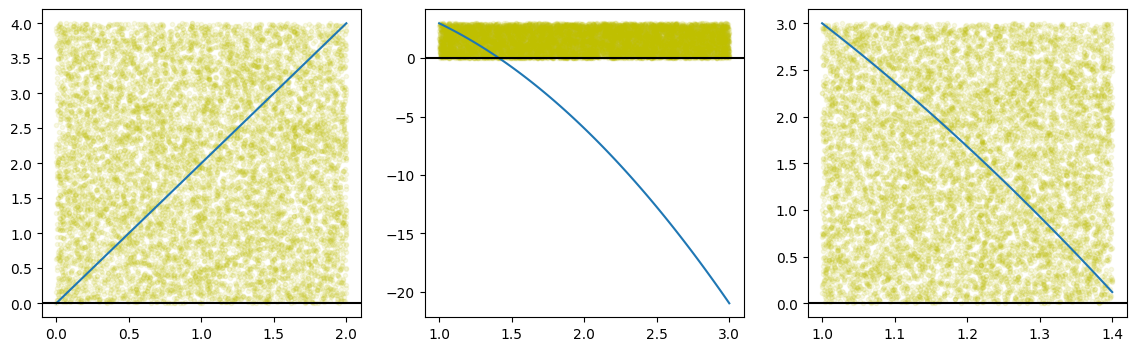

In [109]:
# p≈Øvodn√≠ podoba
i = 0                                                       # poƒçitadlo graf≈Ø
fig, axs = plt.subplots(1, 3, figsize=(14, 4))              # 12" ≈°√≠≈ôka, 4" v√Ω≈°ka
def zobraz(a, b, f, xs, fxs):
    x = np.linspace(a, b, 100)
    axs.flat[i].plot(x, f(x))
    axs.flat[i].axhline(y=0, color='k')
    axs.flat[i].scatter(xs, fxs, marker=".", color='y', alpha=0.1)

def integral(a, b, f, pocet_vzorku):
    max_f = max(f(np.linspace(a, b, 100000)))               # horn√≠ z√°vora
    xs = np.random.uniform(a, b, pocet_vzorku)              # n√°hodn√© hodnoty x (mezi a a b)
    fxs = np.random.uniform(0, max_f, pocet_vzorku)         # n√°hodn√© funkƒçn√≠ hodnoty (pro porovn√°n√≠)
    hits = sum([1 for x, fx in zip(xs, fxs) if fx <= f(x)]) # spoƒç√≠t√° hodnoty pod k≈ôivkou
    zobraz(a, b, f, xs, fxs)
    return (b-a)*max_f*hits/pocet_vzorku                    # obsah obd√©ln√≠ku

# int_0^2(2*x) = _0^2[x**2] = 4 - 0 = 4
print("y = 2x\t\t", integral(a=0, b=2, f=lambda x: 2*x, pocet_vzorku=10000))
i += 1

# int_1^3(-3x**2+6) = _1^3[-x**3+6x] = [-3**3 + 6*3] - [-1**3 + 6*1] =  [-27 + 18] - [-1 + 6] = -9 -5 = -14
print("-3*x**2 + 6\t", integral(a=1, b=3, f=lambda x: -3*x**2 + 6, pocet_vzorku=10000))
i += 1
print("-3*x**2 + 6\t", integral(a=1, b=1.4, f=lambda x: -3*x**2 + 6, pocet_vzorku=10000))
# pod osou y se p≈ô√≠spƒõvky neprojev√≠

plt.show()

In [ ]:
# v√Ωpoƒçet analyticky
import sympy
x = sympy.Symbol("x")
f = -3*x**2 + 6
F = sympy.integrate(f, (x, 1, 3))           # primitivn√≠ funkce
F

-14

Spr√°vn√Ω v√Ωpoƒçet pomoc√≠ horn√≠ i doln√≠ z√°vory
- pro funkce s hodnotami pod osou x nutn√° i doln√≠ z√°vora

In [ ]:
# p≈ô√≠prava funkc√≠
def zobraz(a, b, f, xs, fxs):
    x = np.linspace(a, b, 100)
    axs.flat[i].plot(x, f(x))
    axs.flat[i].axhline(y=0, color='k')
    axs.flat[i].scatter(xs, fxs, marker=".", color='y', alpha=0.1)

def plocha(a, b, f, pocet_vzorku):                          # plocha mezi k≈ôivkou a doln√≠ z√°vorou (to nen√≠ integr√°l!)
    max_f = max(f(np.linspace(a, b, 100000)))               # horn√≠ z√°vora
    min_f = min(f(np.linspace(a, b, 100000)))               # doln√≠ z√°vora
    xs = np.random.uniform(a, b, pocet_vzorku)              # n√°hodn√© hodnoty x (mezi a a b)
    fxs = np.random.uniform(min_f, max_f, pocet_vzorku)     # n√°hodn√© funkƒçn√≠ hodnoty (pro porovn√°n√≠)
    fx_in_domain = [fx for x, fx in zip(xs, fxs) if fx <= f(x) and fx > 0 or fx >= f(x) and fx < 0]
    zasahy = len(fx_in_domain)
    zobraz(a, b, f, xs, fxs)
    return (b-a)*(max_f-min_f)*zasahy/pocet_vzorku

def integral(a, b, f, pocet_vzorku):                        # plocha pod k≈ôivkou nad osou x kladn√°, nad k≈ôivkou pod osou x z√°porn√° (viz nap≈ô. sin(x))
    max_f = max(f(np.linspace(a, b, 100000)))               # horn√≠ z√°vora
    min_f = min(f(np.linspace(a, b, 100000)))               # doln√≠ z√°vora
    xs = np.random.uniform(a, b, pocet_vzorku)              # n√°hodn√© hodnoty x (mezi a a b)
    fxs = np.random.uniform(min_f, max_f, pocet_vzorku)
    kladna_plocha_zasahy = 0
    zaporna_plocha_zasahy = 0

    for x, fx in zip(xs, fxs):
        if 0 <= fx <= f(x):                                 # z√°sah nad osou x a pod k≈ôivkou
            kladna_plocha_zasahy += 1
        elif f(x) <= fx <= 0:                               # z√°sah pod osou x a nad k≈ôivkou
            zaporna_plocha_zasahy += 1

    S_obd = (b - a) * (max_f - min_f)
    procento_kladnych = kladna_plocha_zasahy / pocet_vzorku
    procento_zapornych = zaporna_plocha_zasahy / pocet_vzorku

    zobraz(a, b, f, xs, fxs)
    return S_obd * (procento_kladnych - procento_zapornych)

4.0392
0.3354
0.6765999999323387
-14.0016


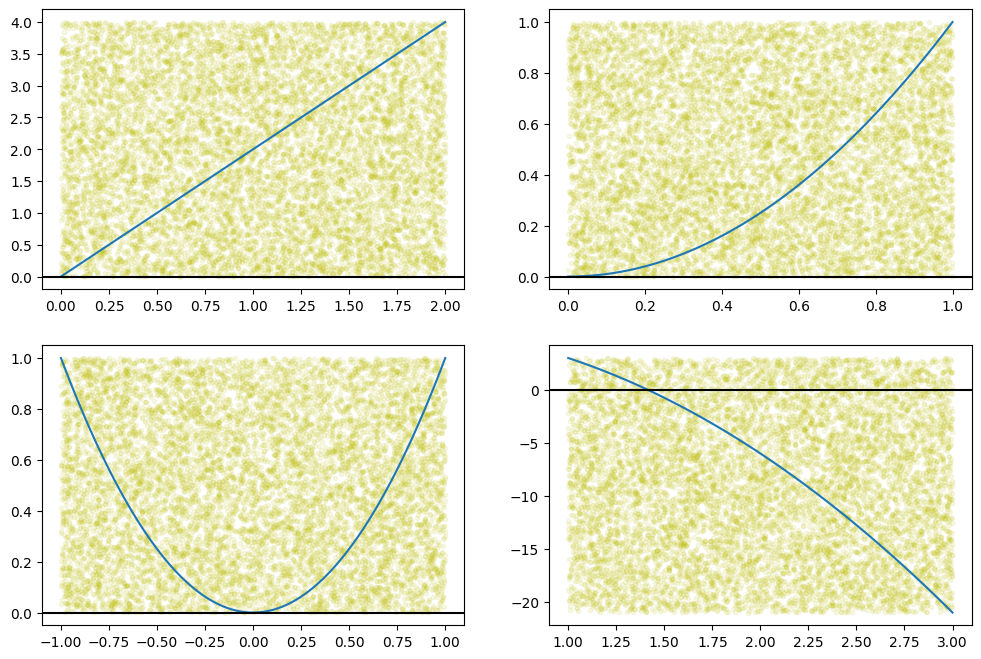

In [ ]:
# vlastn√≠ v√Ωpoƒçet
i = 0                                                       # poƒçitadlo graf≈Ø
fig, axs = plt.subplots(2, 2, figsize=(12, 8))              # 12" ≈°√≠≈ôka, 8" v√Ω≈°ka

#int_0^2(2*x) = 0^2[x**2] = 4 - 0 = 4
print(integral(a=0, b=2, f=lambda x: 2*x, pocet_vzorku=10000))
i += 1

#int_0^1(x**2) = 0^1[1/3 * x**3] = [1/3 1**3] - [1/3 * 0**3] = 1/3
print(integral(a=0, b=1, f=lambda x: x**2, pocet_vzorku=10000))
i += 1

#int_-1^1(x**2) = -1^1[1/3 * x**3] = [1/3 1**3] - [1/3 *(-1)**3] = 2/3
print(integral(a=-1, b=1, f=lambda x: x**2, pocet_vzorku=10000))
i += 1

#int_1^3(-3x**2+6) = 1^3[-x**3+6x] = [-3**3 + 6*3] - [-1**3 + 6*1] =  [-27 + 18] - [-1 + 6] = -9 -5 = -14
print(integral(a=1, b=3, f=lambda x: -3*x**2 + 6, pocet_vzorku=10000))

plt.show()

#### Cviƒçen√≠ 3: Integr√°l

Lep≈°√≠ ≈ôe≈°en√≠ je n√°hodnƒõ vzorkovat prostor $(x,fx)$ a spoƒç√≠tat pr≈Ømƒõrnou navzorkovanou funkƒçn√≠ hodnotu. Integr√°l se pak spoƒç√≠t√° jako plocha oblasti od A do B na ose x a 0 do stredni hodnoty z navzorkovan√Ωch hodnot na ose y.
$$
\overline{I}_n \equiv \frac{1}{n} \sum_{i=1}^{n}I_i = \frac{b-a}{n} \sum_{i=1}^{n}g(a+(b-a)U_i)
$$
<!--img src="MS8_soubory/integral.png" alt="Drawing" style="width: 600px;"/-->

Va≈°√≠m √∫kolem je naprogramovat v√Ωpoƒçet integr√°lu touto metodou.

5.640508527454665


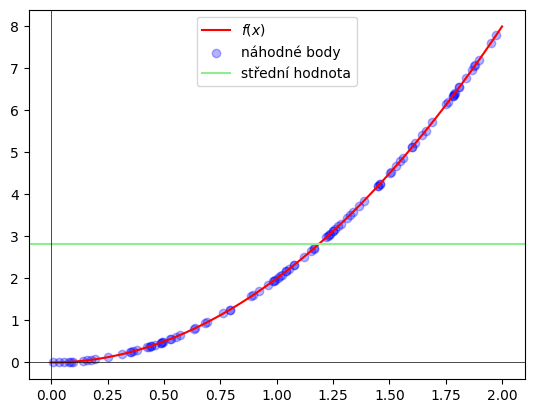

In [54]:
import numpy as np
import matplotlib.pyplot as plt

def integral(a, b, f, n):
    xs = np.random.uniform(a, b, n)
    return (b-a)*np.mean(f(xs)), xs

f=lambda x: 2*x**2

integral_value, generated_xs = integral(a=0, b=2, f=f, n=100)
print(integral_value)

# Vytvo≈ôen√≠ grafu s vygenerovan√Ωmi body
plt.plot(np.linspace(0, 2, 100), f(np.linspace(0, 2, 100)), color='red', label='$f(x)$')
plt.scatter(generated_xs, f(generated_xs), color='blue', alpha=0.3, label='n√°hodn√© body')
plt.axhline(integral_value/(2-0), color = "lightgreen", label="st≈ôedn√≠ hodnota")
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()
plt.show()


In [55]:
def integral(a, b, f, n):
    xs = np.random.uniform(a, b, n)
    return (b-a)*np.mean(f(xs))

#int_0^2(2*x) = 0^2[x**2] = 4 - 0 = 4
print(integral(a=0, b=2, f=lambda x: 2*x, n=10000))

#int_0^1(x**2) = 0^1[1/3 * x**3] = [1/3 1**3] - [1/3 * 0**3] = 1/3
print(integral(a=0, b=1, f=lambda x: x**2, n=10000))

#int_-1^1(x**2) = -1^1[1/3 * x**3] = [1/3 1**3] - [1/3 *(-1)**3] = 2/3
print(integral(a=-1, b=1, f=lambda x: x**2, n=10000))

#int_1^3(-3x**2+6) = 1^3[-x**3+6x] = [-3**3 + 6*3] - [-1**3 + 6*1] =  [-27 + 18] - [-1 + 6] = -9 -5 = -14
print(integral(a=1, b=3, f=lambda x: -3*x**2 + 6, n=10000))

4.0248261623965185
0.33517470775000086
0.6694421389245027
-13.980189171764358
